## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Rishita Goel

### Dataset Extraction

In [1]:
#Importing all the libraries we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Extracting Training data from the url given
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Dataset Visualization

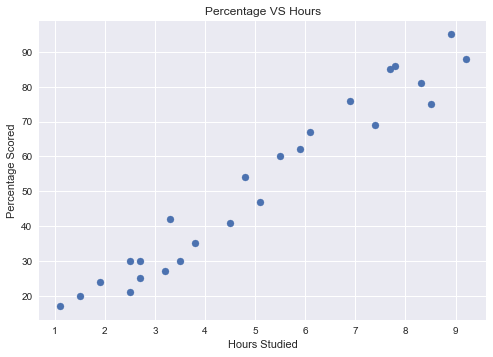

In [52]:
#Placing Hours on X and Percentage(target variable) on Y axis

plt.style.use('seaborn')
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Percentage VS Hours')
plt.show()

We can infer that the data is somewhat linearly distributed along a straing line and therefore linear regression will be the most suited model.

### Dataset Preparation(Training and Testing)

In [53]:
#Converting data into a numpy array
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [25]:
#Spliting data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [26]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


### Creating and Training the Model

In [27]:
linear = LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression()

In [28]:
print(linear.coef_)

[9.87764451]


In [29]:
print(linear.intercept_)

3.0691187993490416


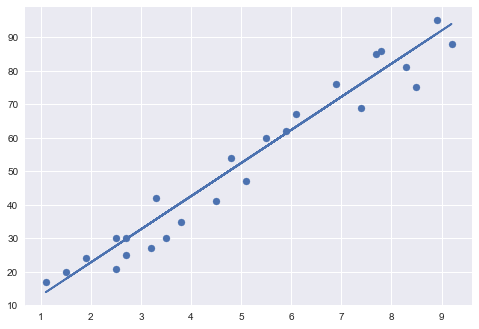

In [30]:
#Plot the predicted regression line
line = X*linear.coef_ + linear.intercept_    #mx+b

plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

### Making Predictions using our Model

In [31]:
predictions = linear.predict(X_test)

In [32]:
print(predictions)

[40.60416792 50.48181243 27.76323006 87.0290971  47.51851908]


In [33]:
# Comparing Actual vs Predicted Results
df = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
0,35,40.604168
1,54,50.481812
2,21,27.763230
3,75,87.029097
4,41,47.518519


### Evaluating our Predictions

Now, we will evaluate our predictions by comparing it with our actual testing data and will calculate mean squared error(mse), mean absolute error(mae) and root mean squared error(rmse).

In [35]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

print('Mean Absolute Error:',mae(Y_test, predictions))
print('Mean Squared Error:',mse(Y_test, predictions))
print('Root mean Squared Error',np.sqrt(mse(Y_test, predictions)))

Mean Absolute Error: 6.886640347176178
Mean Squared Error: 55.34317816192426
Root mean Squared Error 7.439299574686064


### Predicting for custom values

In [51]:
hours = np.array([[9.25]])
pred = linear.predict(hours)
print("No of hours studied = %.2f"%(hours))
print("Predicted Percentage = %d"%(pred[0]))

No of hours studied = 9.25
Predicted Percentage = 94
